In [1]:
rm(list=ls())
getwd() 

[1] "C:/Users/nevin/Downloads/Georgia Tech/Courses/TSA_6402/Project"

In [2]:
setwd("C:/Users/nevin/Downloads/Georgia Tech/Courses/TSA_6402/Project/Kaggle/")
poln1<-read.csv("DekalbwNA.csv", header=T)

In [3]:
# names(poln)
print(dim(poln1))
N=dim(poln1)[1]
head(poln1)

[1] 1949    9


,Date_Local,NO2_AQI,NO2_Mean,O3_AQI,O3_Mean,SO2_AQI,SO2_Mean,CO_AQI,CO_Mean
,<fct>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,10/1/2010,29,16.833333,41,0.024417,1,0.525000,5,0.279167
2,10/2/2010,43,18.333333,45,0.023500,11,0.929167,6,0.275000
3,10/3/2010,25,9.041667,31,0.024917,16,1.368182,6,0.241667
4,10/4/2010,18,9.833333,23,0.016458,9,0.683333,2,0.170833
5,10/5/2010,37,15.291667,31,0.015667,0,0.308333,3,0.225000
6,10/6/2010,48,21.750000,34,0.015333,1,0.754167,6,0.370833


In [4]:
#Linear imputation
poln1[,2:9]=data.frame(lapply(poln1[,2:9], function(X) approxfun(1:1949, X)(1:1949)))

In [5]:
# Exogenous variable
temp<-read.csv("Dekalbtemp.csv", header=T)

In [6]:
print(dim(temp))
print(length(temp[,2]))
head(temp)

[1] 1949    2
[1] 1949


,Date_Local,Temperature
,<fct>,<fct>
1,10/1/2010,64.17
2,10/2/2010,61.13
3,10/3/2010,57.79
4,10/4/2010,53.75
5,10/5/2010,54.08
6,10/6/2010,54.88


In [7]:
#Linear imputation
temp[,2]=approxfun(1:N, temp[,2])(1:N)

In [8]:
ntest=31
n=N-ntest
poln<-poln1[1:n,]
poln_test<-poln1[(n+1):N,]
temp_train<-temp[1:n,2]
temp_test<-temp[(n+1):N,2]

In [9]:
date = as.Date(poln$Date_Local, format="%m/%d/%Y")
month = as.factor(format(date,"%b"))
weekday = as.factor(weekdays(date))
weekend <- grepl("S.+",weekday)

In [10]:
ppmb<-c("NO2_Mean","O3_Mean","SO2_Mean","CO_Mean")
poln_ppmb<-poln[,ppmb]
poln_ppmb.ts=ts(poln_ppmb)

### EDA

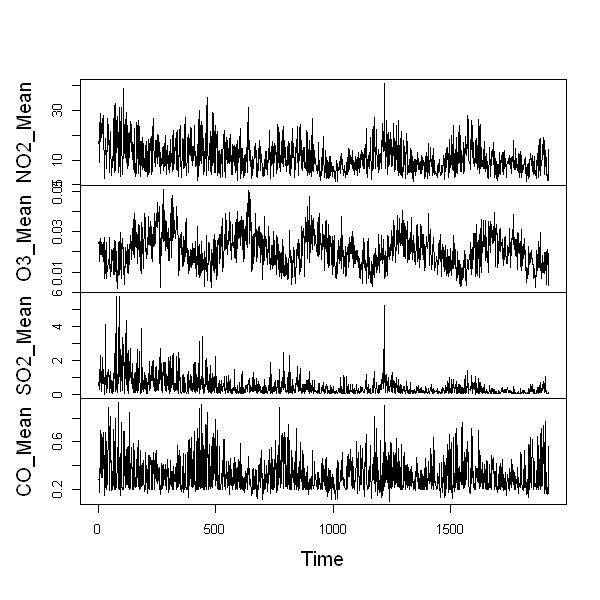

In [11]:
library(repr)
options(repr.plot.width=5, repr.plot.height=5)
plot(poln_ppmb.ts, type="l",main="")

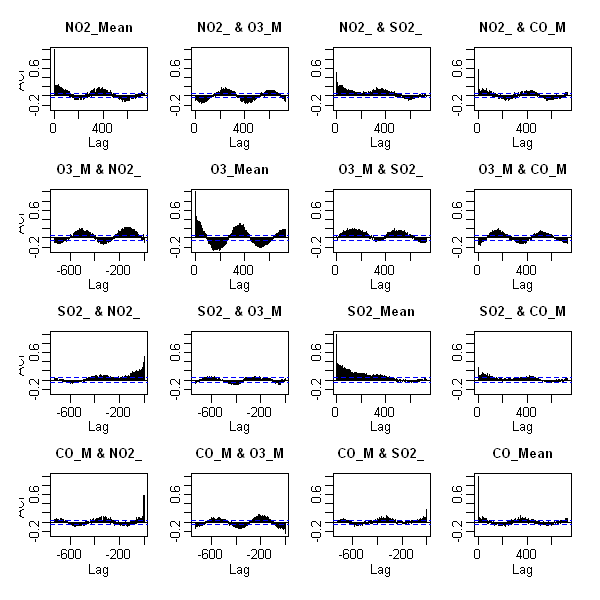

In [12]:
stats::acf(poln_ppmb.ts,lag.max=731)

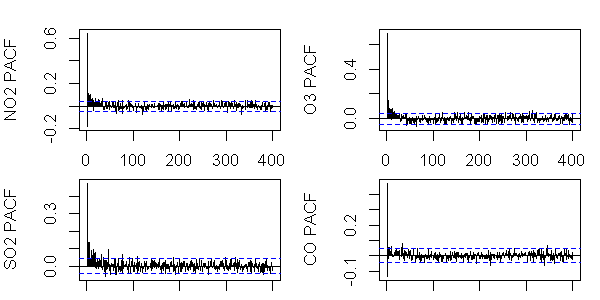

In [13]:
options(repr.plot.width=5, repr.plot.height=2.5)
par(mfrow=c(2,2), mar=c(1,4,1.5,1))
pacf(poln_ppmb.ts[,1], lag.max=400, ylab="NO2 PACF")
pacf(poln_ppmb.ts[,2], lag.max=400, ylab="O3 PACF")
pacf(poln_ppmb.ts[,3], lag.max=400, ylab="SO2 PACF")
pacf(poln_ppmb.ts[,4], lag.max=400, ylab="CO PACF")

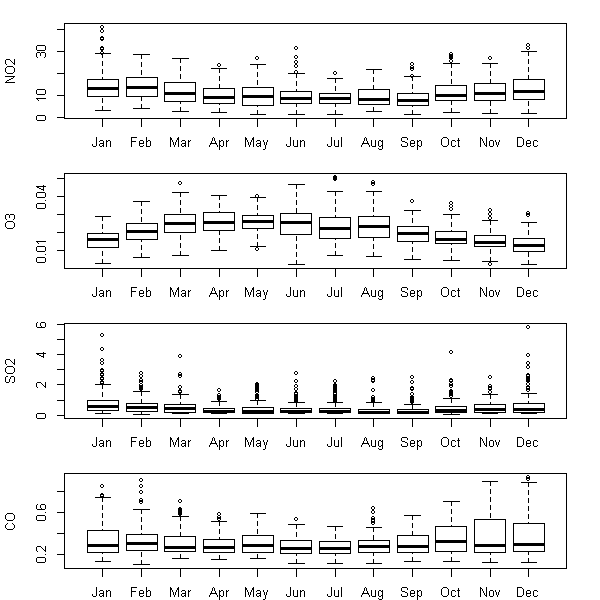

In [14]:
# Boxplots
month=factor(month,levels = month.abb)
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow=c(4,1), mar=c(2,4.1,1.5,2.1))
boxplot(poln_ppmb[,1] ~ month, xlab = "Month", ylab = "NO2")
boxplot(poln_ppmb[,2] ~ month, xlab = "Month", ylab = "O3")
boxplot(poln_ppmb[,3] ~ month, xlab = "Month", ylab = "SO2")
boxplot(poln_ppmb[,4] ~ month, xlab = "Month", ylab = "CO")

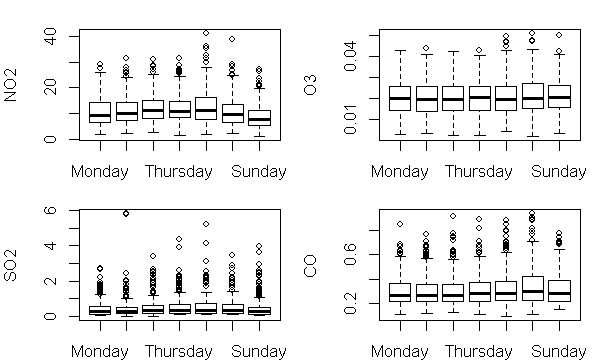

In [15]:
# Boxplots
day <- ordered(weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                        "Friday", "Saturday", "Sunday"))
options(repr.plot.width=5, repr.plot.height=3)
par(mfrow=c(2,2), mar=c(2,4,1.5,1))
boxplot(poln_ppmb[,1] ~ day, xlab = "Weekday", ylab = "NO2")
boxplot(poln_ppmb[,2] ~ day, xlab = "Weekday", ylab = "O3")
boxplot(poln_ppmb[,3] ~ day, xlab = "Weekday", ylab = "SO2")
boxplot(poln_ppmb[,4] ~ day, xlab = "Weekday", ylab = "CO")

In [16]:
library(forecast)
print(ndiffs(poln_ppmb.ts[,1], test='adf'))
print(ndiffs(poln_ppmb.ts[,2], test='adf'))
print(ndiffs(poln_ppmb.ts[,3], test='adf'))
print(ndiffs(poln_ppmb.ts[,4], test='adf'))

Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


[1] 0
[1] 0
[1] 0
[1] 0


In [17]:
library(tseries)
print(adf.test(poln_ppmb.ts[,1]))
print(adf.test(poln_ppmb.ts[,2]))
print(adf.test(poln_ppmb.ts[,3]))
print(adf.test(poln_ppmb.ts[,4]))

Warning message:
"package 'tseries' was built under R version 3.6.3"Warning message in adf.test(poln_ppmb.ts[, 1]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 1]
Dickey-Fuller = -8.2413, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 2]
Dickey-Fuller = -5.5608, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 3]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 3]
Dickey-Fuller = -7.8011, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



Warning message in adf.test(poln_ppmb.ts[, 4]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  poln_ppmb.ts[, 4]
Dickey-Fuller = -9.6049, Lag order = 12, p-value = 0.01
alternative hypothesis: stationary



In [18]:
cor(poln_ppmb)
## lag-one correlation
print(cor(poln_ppmb.ts[1:(n-1),1],poln_ppmb.ts[2:n,3]))
print(cor(poln_ppmb.ts[2:n,1],poln_ppmb.ts[1:(n-1),3]))

,NO2_Mean,O3_Mean,SO2_Mean,CO_Mean
NO2_Mean,1.0000000,-0.10152759,0.51770642,0.5722466
O3_Mean,-0.1015276,1.00000000,0.02463314,-0.1417559
SO2_Mean,0.5177064,0.02463314,1.00000000,0.2791025
CO_Mean,0.5722466,-0.14175594,0.27910248,1.0000000


[1] 0.3759883
[1] 0.4329351


In [19]:
time.pts = c(1:(length(poln_ppmb.ts[,1])+ntest))
time.pts = c(time.pts - min(time.pts))/max(time.pts)
pred.time.pts=time.pts[(length(time.pts)-(ntest-1)):length(time.pts)]
time.pts=time.pts[1:(length(time.pts)-ntest)]
x1 = time.pts
x2 = time.pts^2

### Trend + Seasonality

In [20]:
options(repr.plot.width=5, repr.plot.height=3)

##### NO2


Call:
lm(formula = NO2.ts ~ x1 + x2 + weekday + month)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.8319  -3.3967  -0.5028   2.8601  26.4144 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       19.5522     0.5968  32.762  < 2e-16 ***
x1               -12.7963     1.6680  -7.672 2.70e-14 ***
x2                 7.5030     1.6432   4.566 5.28e-06 ***
weekdayMonday     -1.8408     0.4354  -4.228 2.47e-05 ***
weekdaySaturday   -1.8949     0.4354  -4.352 1.42e-05 ***
weekdaySunday     -3.7773     0.4354  -8.675  < 2e-16 ***
weekdayThursday   -0.6097     0.4354  -1.400  0.16157    
weekdayTuesday    -1.1830     0.4354  -2.717  0.00665 ** 
weekdayWednesday  -0.5070     0.4354  -1.164  0.24442    
monthFeb          -0.5120     0.5931  -0.863  0.38814    
monthMar          -2.3914     0.5791  -4.130 3.79e-05 ***
monthApr          -4.2857     0.5840  -7.338 3.20e-13 ***
monthMay          -4.2215     0.5795  -7.285 4.70e-13 ***
monthJun     

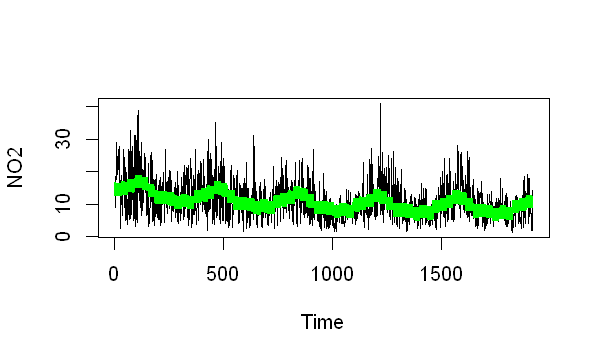

In [21]:
NO2.ts=poln_ppmb.ts[,1]
gam.fit2.NO2 = lm(NO2.ts~x1+x2+weekday+month)
summary(gam.fit2.NO2)

vol.fit.gam2 = fitted(gam.fit2.NO2)
ts.plot(NO2.ts,ylab="NO2")
lines(vol.fit.gam2,lwd=2,col="green")

NO2_tsfit=ts(vol.fit.gam2)
NO2_resid=NO2.ts-vol.fit.gam2

##### O3


Call:
lm(formula = O3.ts ~ x1 + weekday + month)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0240739 -0.0045139 -0.0001283  0.0042504  0.0254662 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.0176796  0.0006785  26.059  < 2e-16 ***
x1               -0.0049684  0.0005290  -9.393  < 2e-16 ***
weekdayMonday    -0.0003367  0.0005581  -0.603  0.54630    
weekdaySaturday   0.0011586  0.0005580   2.076  0.03802 *  
weekdaySunday     0.0010164  0.0005581   1.821  0.06872 .  
weekdayThursday   0.0001470  0.0005580   0.264  0.79219    
weekdayTuesday   -0.0005381  0.0005581  -0.964  0.33503    
weekdayWednesday -0.0004868  0.0005581  -0.872  0.38311    
monthFeb          0.0044694  0.0007602   5.879 4.85e-09 ***
monthMar          0.0096447  0.0007421  12.996  < 2e-16 ***
monthApr          0.0107136  0.0007485  14.313  < 2e-16 ***
monthMay          0.0106663  0.0007427  14.362  < 2e-16 ***
monthJun          0.0098271  0.

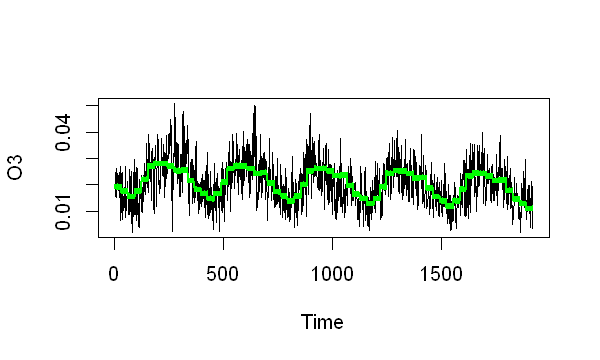

In [22]:
O3.ts=poln_ppmb.ts[,2]
gam.fit2.O3 = lm(O3.ts~x1+weekday+month)
summary(gam.fit2.O3)

vol.fit.gam2 = fitted(gam.fit2.O3)
ts.plot(O3.ts,ylab="O3")
lines(vol.fit.gam2,lwd=2,col="green")

O3_tsfit=ts(vol.fit.gam2)
O3_resid=O3.ts-vol.fit.gam2

# model1<-lm(O3.ts~x1+weekday+month)
# model2<-lm(O3.ts~x1+month)
# anova(model1, model2) # 0.03094062

##### SO2


Call:
lm(formula = SO2.ts ~ x1 + x2 + weekday + month)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1483 -0.2149 -0.0684  0.1229  4.6739 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       1.49978    0.05489  27.322  < 2e-16 ***
x1               -2.38771    0.15342 -15.563  < 2e-16 ***
x2                1.59631    0.15114  10.562  < 2e-16 ***
weekdayMonday    -0.11495    0.04005  -2.870 0.004148 ** 
weekdaySaturday  -0.03501    0.04005  -0.874 0.382085    
weekdaySunday    -0.07674    0.04005  -1.916 0.055500 .  
weekdayThursday  -0.02155    0.04005  -0.538 0.590654    
weekdayTuesday   -0.11040    0.04005  -2.757 0.005898 ** 
weekdayWednesday -0.05336    0.04005  -1.332 0.182871    
monthFeb         -0.19120    0.05456  -3.505 0.000468 ***
monthMar         -0.24821    0.05326  -4.660 3.38e-06 ***
monthApr         -0.42252    0.05372  -7.865 6.13e-15 ***
monthMay         -0.35100    0.05330  -6.585 5.86e-11 ***
monthJun         -0.366

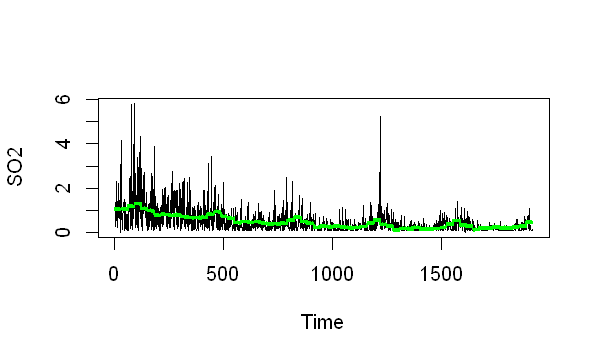

In [23]:
SO2.ts=poln_ppmb.ts[,3]
gam.fit2.SO2 = lm(SO2.ts~x1+x2+weekday+month)
summary(gam.fit2.SO2)

vol.fit.gam2 = fitted(gam.fit2.SO2)
ts.plot(SO2.ts,ylab="SO2")
lines(vol.fit.gam2,lwd=2,col="green")

SO2_tsfit=ts(vol.fit.gam2)
SO2_resid=SO2.ts-vol.fit.gam2

##### CO


Call:
lm(formula = CO.ts ~ x1 + weekday + month)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26888 -0.09298 -0.03002  0.07193  0.54818 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.3640152  0.0135125  26.939  < 2e-16 ***
x1               -0.0369459  0.0105353  -3.507 0.000464 ***
weekdayMonday    -0.0191695  0.0111149  -1.725 0.084750 .  
weekdaySaturday   0.0153670  0.0111145   1.383 0.166946    
weekdaySunday    -0.0072248  0.0111146  -0.650 0.515754    
weekdayThursday  -0.0132569  0.0111145  -1.193 0.233114    
weekdayTuesday   -0.0210232  0.0111149  -1.891 0.058717 .  
weekdayWednesday -0.0173585  0.0111148  -1.562 0.118514    
monthFeb         -0.0002838  0.0151403  -0.019 0.985048    
monthMar         -0.0283981  0.0147809  -1.921 0.054847 .  
monthApr         -0.0501138  0.0149079  -3.362 0.000790 ***
monthMay         -0.0314351  0.0147915  -2.125 0.033698 *  
monthJun         -0.0627033  0.0149223  -4.202 2.77

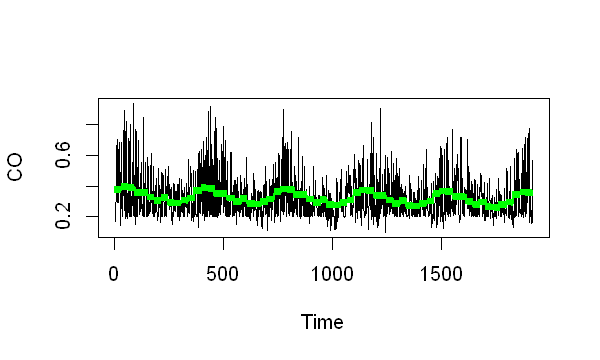

In [24]:
CO.ts=poln_ppmb.ts[,4]
gam.fit2.CO = lm(CO.ts~x1+weekday+month)
summary(gam.fit2.CO)

vol.fit.gam2 = fitted(gam.fit2.CO)
ts.plot(CO.ts,ylab="CO")
lines(vol.fit.gam2,lwd=2,col="green")

CO_tsfit=ts(vol.fit.gam2)
CO_resid=CO.ts-vol.fit.gam2

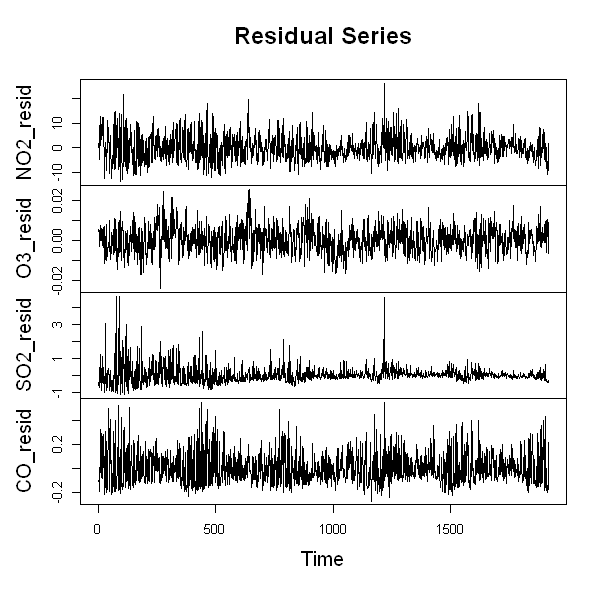

In [25]:
poln.resid=cbind(NO2_resid,O3_resid,SO2_resid,CO_resid)
options(repr.plot.width=5, repr.plot.height=5)
plot(poln.resid, main="Residual Series")

## ARMA

In [26]:
library(TSA)

Warning message:
"package 'TSA' was built under R version 3.6.3"Registered S3 methods overwritten by 'TSA':
  method       from    
  fitted.Arima forecast
  plot.Arima   forecast

Attaching package: 'TSA'

The following objects are masked from 'package:stats':

    acf, arima

The following object is masked from 'package:utils':

    tar



##### NO2

In [27]:
## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(NO2_resid,order = c(p[i],0,q[j]), xreg=temp_train,  method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}

aicv = as.vector(aic)  
#plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1
print(c(porder, qorder))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning messa

[1] 4 2


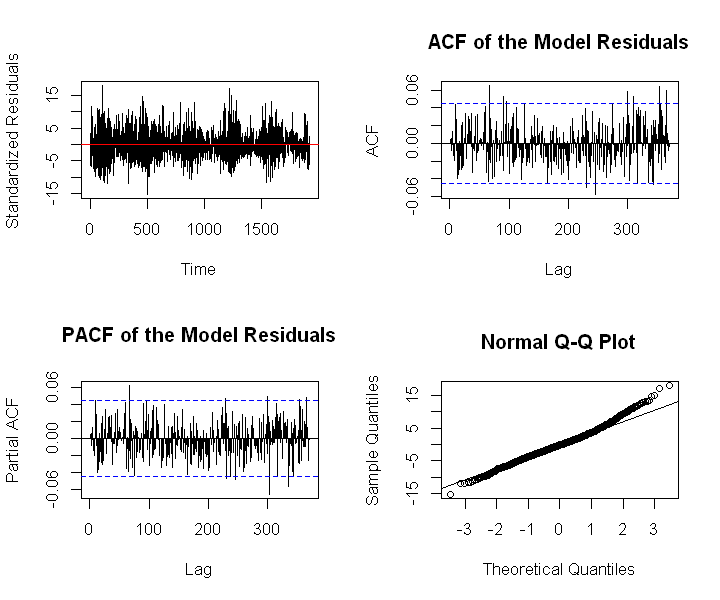

In [28]:
## Fit ARMA Model
armaNO2.model = arima(NO2_resid,order = c(porder,0,qorder), xreg=temp_train, method='ML')
resids.1 = resid(armaNO2.model)

## Residual Analysis
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0,col='red')
acf(resids.1,lag.max=370, main='ACF of the Model Residuals')
pacf(resids.1,lag.max=370,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)

In [29]:
summary(armaNO2.model)


Call:
arima(x = NO2_resid, order = c(porder, 0, qorder), xreg = temp_train, method = "ML")

Coefficients:
         ar1     ar2      ar3     ar4     ma1      ma2  intercept     xreg
      0.6895  0.7096  -0.6388  0.2209  0.0152  -0.9463     1.5058  -0.0028
s.e.  0.0326  0.0431   0.0348  0.0241  0.0236   0.0226     0.5577   0.0008

sigma^2 estimated as 16.27:  log likelihood = -5397.06,  aic = 10810.13

Training set error measures:


Warning message in trainingaccuracy(f, test, d, D):
"test elements must be within sample"

              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN


In [30]:
## Test for Independence for final model
Box.test(resids.1, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1
X-squared = 1.1404, df = 1, p-value = 0.2856



	Box-Ljung test

data:  resids.1
X-squared = 1.1446, df = 1, p-value = 0.2847


In [31]:
## Test for heteroscedasticity in residuals
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1^2
X-squared = 147.35, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  resids.1^2
X-squared = 147.81, df = 1, p-value < 2.2e-16


##### O3

In [32]:
## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(O3_resid,order = c(p[i],0,q[j]), xreg=temp_train,  method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}

aicv = as.vector(aic)  
# plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1
print(c(porder, qorder))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] 2 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

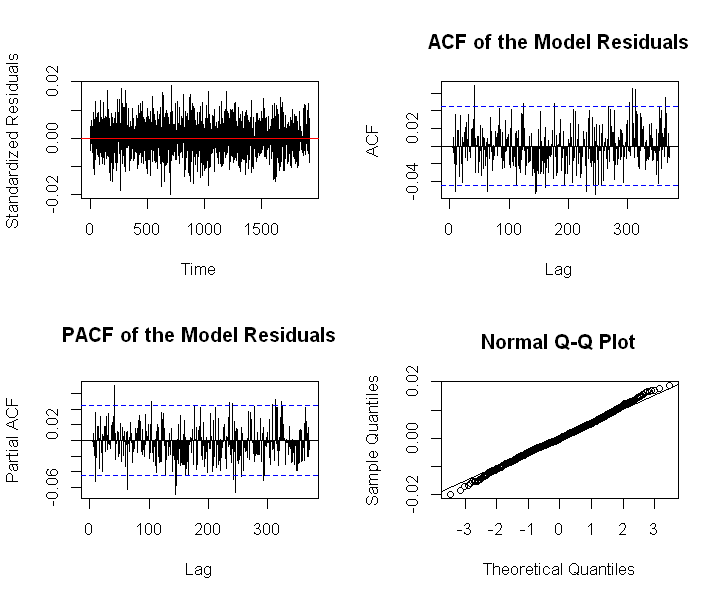

In [33]:
## Fit ARMA Model
armaO3.model = arima(O3_resid,order = c(porder,0,qorder), xreg=temp_train, method='ML')
resids.1 = resid(armaO3.model)

## Residual Analysis
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0,col='red')
acf(resids.1,lag.max=370, main='ACF of the Model Residuals')
pacf(resids.1,lag.max=370,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)

In [34]:
## Test for Independence for final model
Box.test(resids.1, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1
X-squared = 0.99407, df = 1, p-value = 0.3187



	Box-Ljung test

data:  resids.1
X-squared = 0.99907, df = 1, p-value = 0.3175


In [35]:
## Test for heteroscedasticity in residuals
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1^2
X-squared = 16.074, df = 1, p-value = 6.093e-05



	Box-Ljung test

data:  resids.1^2
X-squared = 16.126, df = 1, p-value = 5.927e-05


##### SO2

In [36]:
## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(SO2_resid,order = c(p[i],0,q[j]), xreg=temp_train,  method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}

aicv = as.vector(aic)  
# plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1
print(c(porder, qorder))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning messa

[1] 4 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

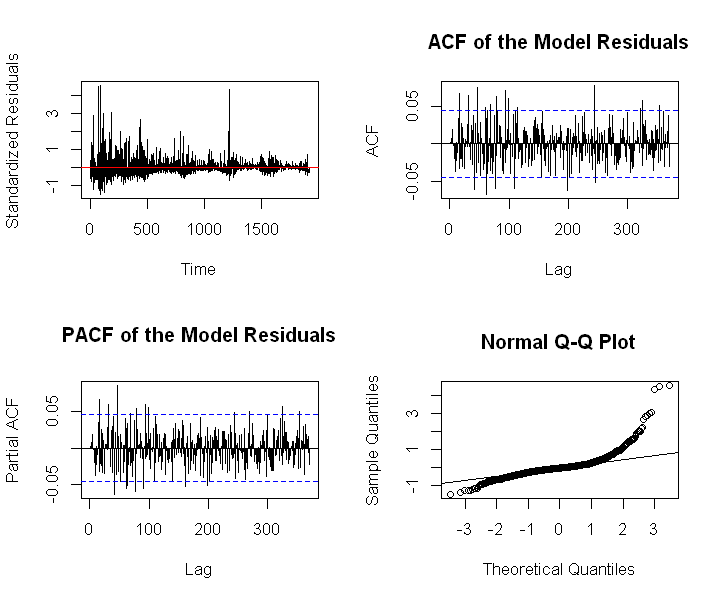

In [37]:
## Fit ARMA Model
armaSO2.model = arima(SO2_resid,order = c(porder,0,qorder), xreg=temp_train, method='ML')
resids.1 = resid(armaSO2.model)

## Residual Analysis
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0,col='red')
acf(resids.1,lag.max=370, main='ACF of the Model Residuals')
pacf(resids.1,lag.max=370,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)

In [38]:
## Test for Independence for final model
Box.test(resids.1, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1
X-squared = 5.0183, df = 1, p-value = 0.02508



	Box-Ljung test

data:  resids.1
X-squared = 5.0438, df = 1, p-value = 0.02471


In [39]:
## Test for heteroscedasticity in residuals
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1^2
X-squared = 136.9, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  resids.1^2
X-squared = 137.33, df = 1, p-value < 2.2e-16


##### CO

In [40]:
## Order selection -- AIC 
norder = 6
p = c(1:norder)-1; q = c(1:norder)-1
aic = matrix(0,norder,norder)
for(i in 1:norder){
  for(j in 1:norder){
    modij = arima(CO_resid,order = c(p[i],0,q[j]), xreg=temp_train, method='ML')
    aic[i,j] = modij$aic-2*(p[i]+q[j]+1)+2*(p[i]+q[j]+1)*n/(n-p[i]-q[j]-2)
  }  
}

aicv = as.vector(aic)  
# plot(aicv,ylab="AIC values")
indexp = rep(c(1:norder),norder)
indexq = rep(c(1:norder),each=norder)
indexaic = which(aicv == min(aicv))
porder = indexp[indexaic]-1
qorder = indexq[indexaic]-1
print(c(porder, qorder))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"Warning messa

[1] 3 5


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

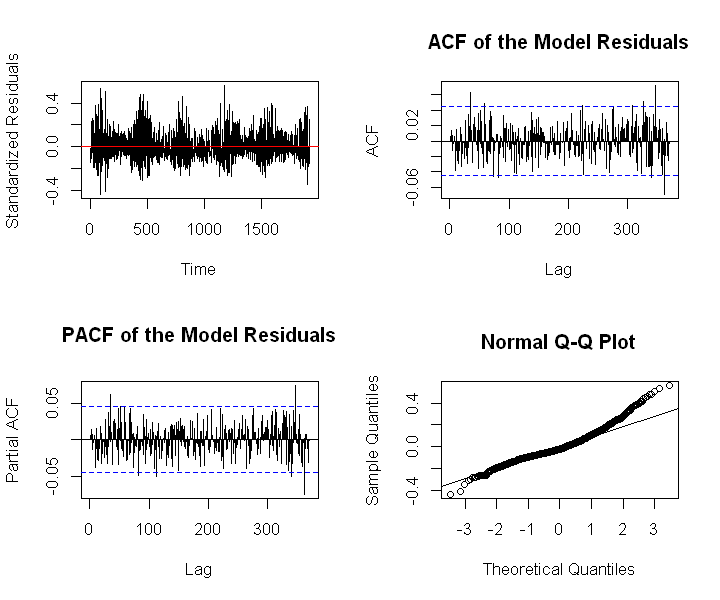

In [41]:
## Fit ARMA Model
armaCO.model = arima(CO_resid,order = c(porder,0,qorder), xreg=temp_train, method='ML')
resids.1 = resid(armaCO.model)

## Residual Analysis
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,2))
plot(resids.1, ylab='Standardized Residuals')
abline(h=0,col='red')
acf(resids.1,lag.max=370, main='ACF of the Model Residuals')
pacf(resids.1,lag.max=370,main='PACF of the Model Residuals')
qqnorm(resids.1)
qqline(resids.1)

In [42]:
## Test for Independence for final model
Box.test(resids.1, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1
X-squared = 3.8831, df = 1, p-value = 0.04878



	Box-Ljung test

data:  resids.1
X-squared = 3.9021, df = 1, p-value = 0.04823


In [43]:
## Test for heteroscedasticity in residuals
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Box-Pierce", fitdf = (porder+qorder))
Box.test(resids.1^2, lag = (porder+qorder+1), type = "Ljung-Box", fitdf = (porder+qorder))


	Box-Pierce test

data:  resids.1^2
X-squared = 147.81, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  resids.1^2
X-squared = 148.26, df = 1, p-value < 2.2e-16


##### Predictions

In [44]:
# Prediction variables
pred.date = as.Date(poln_test$Date_Local, format="%m/%d/%Y")
pred.month = as.factor(format(pred.date,"%b"))
pred.weekday = as.factor(weekdays(pred.date))
pred.input=data.frame(x1=pred.time.pts, x2=pred.time.pts^2, month=pred.month, weekday=pred.weekday)

In [45]:
# MAPE
NO2_arma_pred=predict(armaNO2.model, n.ahead=ntest, newxreg=temp_test)$pred
O3_arma_pred=predict(armaO3.model, n.ahead=ntest, newxreg=temp_test)$pred
SO2_arma_pred=predict(armaSO2.model, n.ahead=ntest, newxreg=temp_test)$pred
CO_arma_pred=predict(armaCO.model, n.ahead=ntest, newxreg=temp_test)$pred

paste("NO2 MAPE: ", mean(abs((poln_test$NO2_Mean-NO2_arma_pred-predict(gam.fit2.NO2,pred.input))/poln_test$NO2_Mean)))
paste("O3 MAPE: ", mean(abs((poln_test$O3_Mean-O3_arma_pred-predict(gam.fit2.O3,pred.input))/poln_test$O3_Mean)))
paste("SO2 MAPE: ", mean(abs((poln_test$SO2_Mean-SO2_arma_pred-predict(gam.fit2.SO2,pred.input))/poln_test$SO2_Mean)))
paste("CO MAPE: ", mean(abs((poln_test$CO_Mean-CO_arma_pred-predict(gam.fit2.CO,pred.input))/poln_test$CO_Mean)))

[1] "NO2 MAPE:  0.480469546592303"

[1] "O3 MAPE:  0.416209808335282"

[1] "SO2 MAPE:  2.10433469124834"

[1] "CO MAPE:  0.383371176592913"

In [46]:
armaX_pred<-cbind(NO2_arma_pred, O3_arma_pred, SO2_arma_pred, CO_arma_pred)
write.csv(armaX_pred,"armaX_pred.csv", row.names = FALSE)

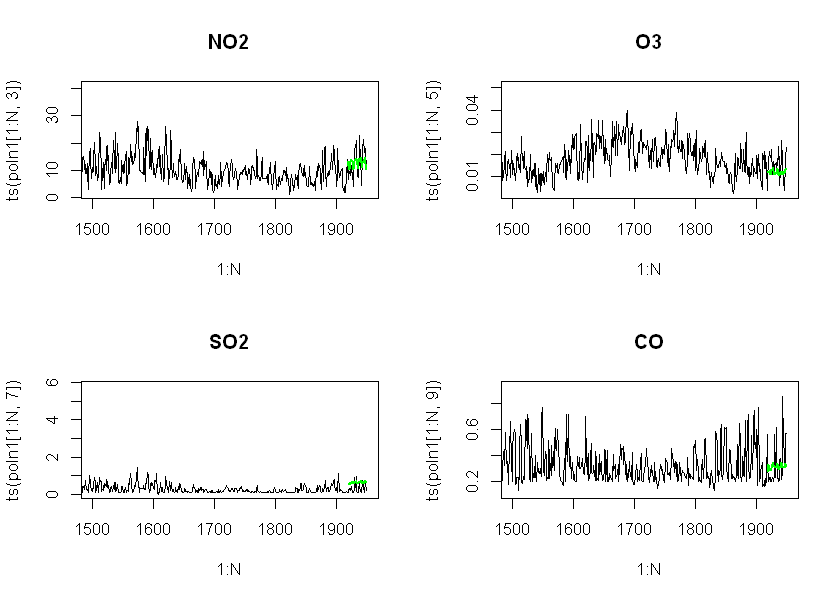

In [47]:
options(repr.plot.width=7, repr.plot.height=5)
par(mfrow=c(2,2))
plot(1:N,ts(poln1[1:N,3]),type='l',xlim=c(1500,1950),main="NO2")
lines((n+1):N,NO2_arma_pred+predict(gam.fit2.NO2,pred.input),col="green",lwd=2,type='l')
plot(1:N,ts(poln1[1:N,5]),type='l',xlim=c(1500,1950),main="O3")
lines((n+1):N,O3_arma_pred+predict(gam.fit2.O3,pred.input),col="green",lwd=2,type='l')
plot(1:N,ts(poln1[1:N,7]),type='l',xlim=c(1500,1950),main="SO2")
lines((n+1):N,SO2_arma_pred+predict(gam.fit2.SO2,pred.input),col="green",lwd=2,type='l')
plot(1:N,ts(poln1[1:N,9]),type='l',xlim=c(1500,1950),main="CO")
lines((n+1):N,CO_arma_pred+predict(gam.fit2.CO,pred.input),col="green",lwd=2,type='l')